# This notebook is for Project assignment in Electromagnetic Class at Kasetsart University.  
Information in this notebook will be updated later.  
Students will need to fork the notebook and add more explanation and plot distribution of electric potential and electric field. Find capacitance values.  
Some of this notebook will be written in Thai.


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy.constants
import math
eps0 = scipy.constants.epsilon_0
pi = scipy.constants.pi
e = scipy.constants.elementary_charge
G = scipy.constants.gravitational_constant
m_e = scipy.constants.m_e
m_p = scipy.constants.m_p
k=1/(4*pi*eps0)


# Problem statement  
<img   src="https://raw.githubusercontent.com/githubdcw/imagesforkagle/main/0120521720202/twodimensionparallelplatecapacitanc-FD.jpg" width=500 />  

# Things which students could do.   
1. อธิบายตัวอย่าง ให้ดีขึ้น plot ให้สวยขึ้น เช่น ใส่ grid ใส่ xlabel ylabel title
1. Plot สนามไฟฟ้า
1. หาค่าความเก็บประจุของ parallel plate capacitance ลองเทียบกับค่าที่ได้จากสูตรของแผ่นใหญ่เป็นอนันต์ และเทียบกับ [https://www.kaggle.com/denchai/0120521720202-2d-parallel-plate-capacitor](https://www.kaggle.com/denchai/0120521720202-2d-parallel-plate-capacitor)  
1. ทดลองผลของขนาดของ Wbox Hbox ต่อค่า Capacitance 



# Example  
ให้ grid เท่ากับ d/4 = 0.025

In [2]:
Wbox = 6
Hbox = 4
W = 2
d = 0.1
h = d/4
xx = [int(round(ii*1000))/1000 for ii in list(np.linspace(-Wbox/2, Wbox/2, int(Wbox/h)+1))]
yy = [int(round(ii*1000))/1000 for ii in list(np.linspace(-Hbox/2, Hbox/2, int(Hbox/h)+1))]
xx1, yy1 = np.meshgrid(xx,yy)

# กำหนดศักย์ไฟฟ้าเริ่มต้น  
ให้ทุกจุดเป็นศูนย์โวลท์  
ใส่ศักย์ไฟฟ้าที่แผ่นโหละ
mask บริเวณแผ่นโลหะ และกล่อง ซึ่งศักย์ไฟฟ้าไม่เปลี่ยน

In [3]:
vv = np.zeros(xx1.shape)
vv[np.where((yy1==-d/2) & (xx1>=-1) & (xx1<=1))] = 5
vv[np.where((yy1== d/2) & (xx1>=-1) & (xx1<=1))] = -5
mask = np.where(((yy1==  d/2) & (xx1>=-1) & (xx1<=1)) | \
                ((yy1== -d/2) & (xx1>=-1) & (xx1<=1)) | \
                ((yy1==  Hbox/2) & (xx1>= -Wbox/2) & (xx1<= Wbox/2)) | \
                ((yy1== -Hbox/2) & (xx1>= -Wbox/2) & (xx1<= Wbox/2)) | \
                ((xx1==  Wbox/2) & (yy1>= -Hbox/2) & (yy1<= Hbox/2)) | \
                ((xx1== -Wbox/2) & (yy1>= -Hbox/2) & (yy1<= Hbox/2)) )
maskx = []
for ii in range(len(mask[0])):
    maskx.append((mask[0][ii],mask[1][ii]))

# คำนวนค่าศักย์ไฟฟ้าโดยวิธี Iteration  
และประมาณ Laplace's Equation ด้วย Finite Difference ซึ่งจะได้สมการความสัมพันธ์ของศักย์ไฟฟ้าที่แต่ละจุดดังนี้ $V_0 = \frac{1}{4}( V_1+V_2+V_3+V_4)$ 


In [4]:
m, n = xx1.shape
niter = 100
for kk in range(niter):
    for ii in range(m):
        for jj in range(n):
            if (ii,jj) not in maskx:
                vv[ii,jj] = 0.25* (vv[ii-1,jj]+vv[ii+1,jj]+vv[ii,jj-1]+vv[ii,jj+1])             
np.save('output.npy', vv)

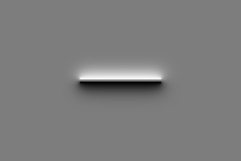

In [5]:
def imshow(img):
    import cv2
    import IPython
    _,ret = cv2.imencode('.jpg', img) 
    i = IPython.display.Image(data=ret)
    IPython.display.display(i)

imshow((vv+5)*25)

# คำนวนค่าความหนาแน่นประจุเชิงผิว  
คำนวนค่าความหนาแน่นประจุเชิงผิวที่แผ่นโลหะที่มีศักย์ไฟฟ้าเท่ากับ 5 โวลท์  

In [6]:
rhos = (5-vv[np.where((yy1==int(round((-d/2+h)*1000))/1000) & (xx1>=-1) & (xx1<=1))])
rhos = rhos +(5-vv[np.where((yy1==int(round((-d/2-h)*1000))/1000) & (xx1>=-1) & (xx1<=1))])
rhos = eps0*rhos/h

# Plot ความหนาแน่นประจุ 
ความหนาแน่นประจุ $\rho_s$ บนขั้ว 5 โวลท์

In [7]:
import matplotlib.pyplot as plt
plt.plot([-W/2+ii*h for ii in range(81)],rhos)
plt.show()

# คำนวนประจุต่อเมตรบนขั้ว 5 โวลท์  
เนื่องจากแผ่นโลหะยาวในทิศทาง $z$ เป็นอนันต์ จึงคิดประจุต่อเมตร ซึ่งมีหน่วยเป็น [C/m]

In [8]:
print('Charge on 5-volt terminal is ', h*rhos.sum())

Charge on 5-volt terminal is  2.1269201052586253e-09
